In [1]:

#Forecasting Timeseries Data Using Facebook FbProphet
#Steps Required With FbProphet
#Install pystan
#conda install -c conda-forge fbprophet
#FBPROPHET
    #can do sales forecasting and different types of forecasting, just like arima
    
####STEPS to be done
#1. Introduction And Installation
#2. Data Preprocessing With Time Seires
#3. Model Fitting
#4. Obtaining The Forecasts
#5. Plotting The Forecasts
#6. Cross Validation
#7. Computing Performance Metrics
#8. Visualize the Performance MEtrics
#9. Conclusions

#Fbprophet
    #Completely Different from ARIMA

In [49]:

### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/Feature-Engineering-Live-sessions/master/monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [42]:
df.tail()
#there are some bad values located
#since this the only record, will drop it

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [51]:
df.drop(168,axis=0,inplace=True)
#axis 0 is row,
#axis 1 is col


In [52]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


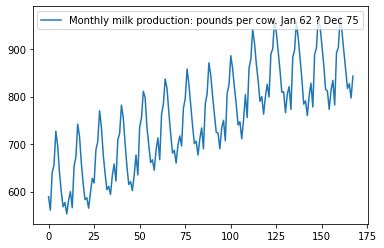

In [53]:
df.plot()
#we see the sales is increasing in this particular way
#its a seasonal data

In [54]:
df.columns=["ds","y"]
##we rename colns as it looks so big
#we are renaming in this way bse, this is how its supposed to be used if ur using prophet library
#Date should be DS
#Year should be Y

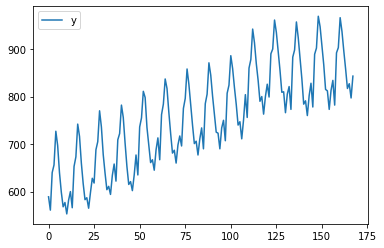

In [55]:

df.plot()

In [56]:

df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [57]:
#currently ds is not in date time format, lets convert to date time format
df['ds']=pd.to_datetime(df['ds'])

In [58]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


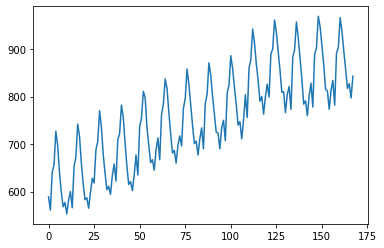

In [59]:
df['y'].plot()
#It is always said that, we need to convert seasonal data to stationary data

In [60]:
df['y'].shift(1)
#we are shifting the first value to the next row, shifting one value down
#and the last value gets deleted
#we are shifting because we want to convert data into stationary


0        NaN
1      589.0
2      561.0
3      640.0
4      656.0
       ...  
163    896.0
164    858.0
165    817.0
166    827.0
167    797.0
Name: y, Length: 168, dtype: float64

In [61]:
df['y'] = df['y'] - df['y'].shift(1)

In [62]:
df.head()

,ds,y
0,1962-01-01,NaN
1,1962-02-01,-28.0
2,1962-03-01,79.0
3,1962-04-01,16.0
4,1962-05-01,71.0


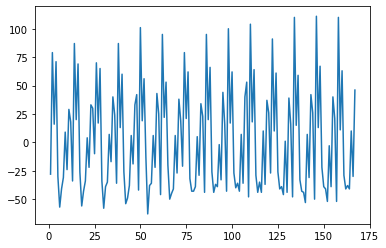

In [63]:
df['y'].plot()
#now my data is almost stationary
#suppose if in one shift, my data is not stationary, again we do shifting
#we make it stationary so that it has constant variance througout

In [64]:
from fbprophet import Prophet

In [65]:
dir(Prophet)
#these are the inbuilt functions built inside prophet


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [17]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [66]:
### Now i will intiialize the Model
model=Prophet()
model.fit(df)
#in this step, make sure to convert col names to ds and y
#Link: facebook.github.io/prophet/docs/quick_start.html

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/riteshtripathi/opt/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [19]:

model

In [67]:
model.seasonalities
#from dataset it has understood

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [21]:
model.component_modes
#after model, press dot . and tab to see what all functions it has learnt
#our data is monthly, by default it will take data as year seasonality

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [68]:
####Now we need to do forecasting, for that i need some future dates
#### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [74]:
df.tail()

,ds,y
163,1975-08-01,-38.0
164,1975-09-01,-41.0
165,1975-10-01,10.0
166,1975-11-01,-30.0
167,1975-12-01,46.0


In [70]:
future_dates
#it has started from 1962
#last date from above is 1975
#hence from 1975 till 1976 it has been created

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [71]:
### Prediction for future dates
prediction=model.predict(future_dates)

In [72]:
prediction.head()
#yhat_lower is the 'predicted lower value'
#yhat_upper is the 'predicted upper value'
#yhat is the actual 'predcited value'
#therefore yhat value ranges between yhat lower to yhat upper

#Difference between prediction and forecasting
#predcition: for this particular day, this the value
#forecasting: it is going to show the trends

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,1.954703,17.321446,36.184900,1.954703,1.954703,24.990932,24.990932,24.990932,24.990932,24.990932,24.990932,0.0,0.0,0.0,26.945635
1,1962-02-01,1.952435,-47.118660,-29.045569,1.952435,1.952435,-40.257699,-40.257699,-40.257699,-40.257699,-40.257699,-40.257699,0.0,0.0,0.0,-38.305264
2,1962-03-01,1.950386,85.255423,103.835269,1.950386,1.950386,93.022669,93.022669,93.022669,93.022669,93.022669,93.022669,0.0,0.0,0.0,94.973056
3,1962-04-01,1.948118,6.166775,25.861457,1.948118,1.948118,14.325281,14.325281,14.325281,14.325281,14.325281,14.325281,0.0,0.0,0.0,16.273399
4,1962-05-01,1.945924,53.341875,71.910486,1.945924,1.945924,60.543724,60.543724,60.543724,60.543724,60.543724,60.543724,0.0,0.0,0.0,62.489647


In [27]:
(8.974783+27.786856)/2
#just seeing the mean, 

18.3808195

In [28]:
#lets forecast the tail part to see if the data is upto for 1976
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.509924,804.510286,827.275914
529,1976-11-27,818.710467,807.906694,829.862394
530,1976-11-28,822.093989,811.131830,833.583542
531,1976-11-29,825.598041,814.557840,836.705725
532,1976-11-30,829.152923,817.719384,840.587860


In [29]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()
#for 1962

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.856671,577.224262,596.537526
1,1962-02-01,546.131669,536.900010,556.276802
2,1962-03-01,641.636702,631.873985,651.587068
3,1962-04-01,658.671820,648.928856,668.375211
4,1962-05-01,721.656421,711.351146,731.025439


In [ ]:
###NOW FORECASTING
###Plotting the Forecasts
    #Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. 
    #This is achieved using model.plot() and passing in our forecasts as the argument. 
    #The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.


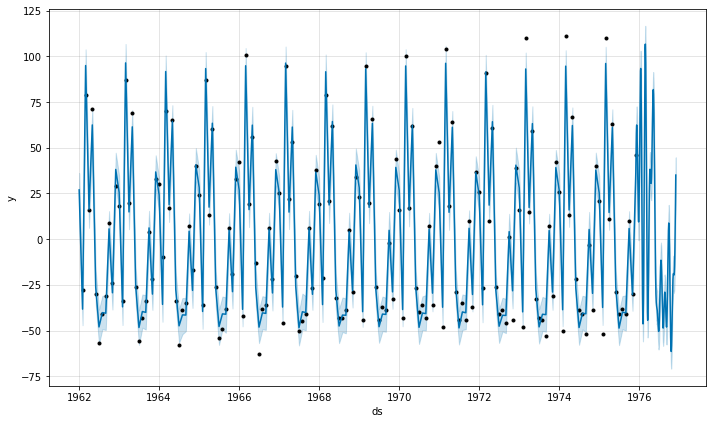

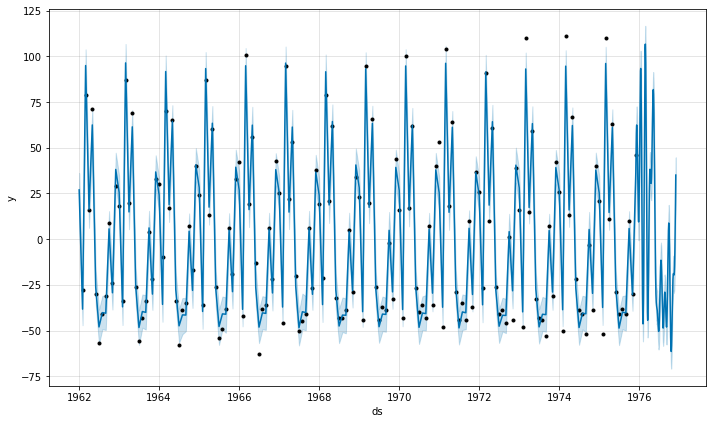

In [73]:

#### plot the predicted projection, it will take yhat value with the orignal value
model.plot(prediction)

#whatever the darker blue line you see is the predcited value
#the black dot points represent the data in our data set, or they are the real data
#the light blue color you see, they are the trends

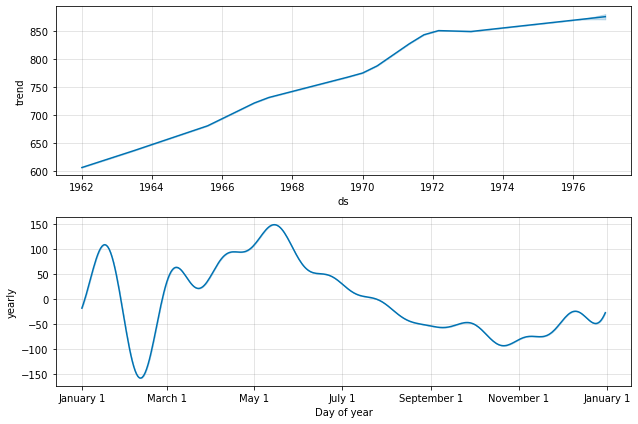

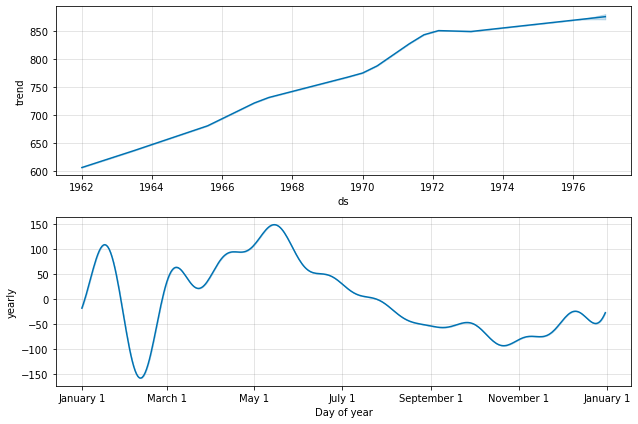

In [31]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(prediction)
#

In [ ]:
###Cross Validation
#Next let’s measure the forecast error using the historical data. 
#We’ll do this by comparing the predicted values with the actual values. 
#In order to perform this operation we select cut of points in the history of the data 
#and fit the model with data upto that cut off point. 
#Afterwards we compare the actual values to the predicted values. 
#The cross_validation method allows us to do this in Prophet. 
#This method take the following parameters as explained below:

#1. horizon the forecast horizon
#2. initial the size of the initial training period
#3. period the spacing between cutoff dates

In [32]:

df.shape

(168, 2)

In [33]:
from fbprophet.diagnostics import cross_validation

#this cross validation is different from sklearn crossvalidation
#time series cross validation is different
    #we need to divide dataset based on time series

In [34]:
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')
#period: 365*0.5 is 180days, 
#initial: 365 * 3= 1095

#now 20 days have been made as forecast


INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00
/Users/riteshtripathi/opt/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [35]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [36]:
df_cv.head()
#what this means, from 1962 to 1965 it has taken as training dataset

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,622.349875,620.395835,624.354560,622.0,1965-01-22
1,1965-03-01,705.251772,698.785755,712.188432,709.0,1965-01-22
2,1965-04-01,720.817313,707.813328,734.308945,722.0,1965-01-22
3,1965-05-01,790.632931,768.458734,813.873545,782.0,1965-01-22
4,1965-06-01,759.096771,728.177594,793.134932,756.0,1965-01-22


In [ ]:
#Obtaining the Performance Metrics
#We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),
#Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) 
#and the coverage of the the yhat_lower and yhat_upper estimates

In [75]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,251.681531,15.864474,12.114150,0.015485,0.013649,0.40
1,41 days,249.633047,15.799780,12.031082,0.015415,0.013649,0.40
2,42 days,265.888634,16.306092,12.524202,0.016095,0.014435,0.40
3,43 days,268.001330,16.370746,12.809398,0.016548,0.014435,0.38
4,46 days,254.535810,15.954178,12.600853,0.016289,0.014435,0.36


In [76]:
df_performance
#whole dataset

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,251.681531,15.864474,12.114150,0.015485,0.013649,0.40
1,41 days,249.633047,15.799780,12.031082,0.015415,0.013649,0.40
2,42 days,265.888634,16.306092,12.524202,0.016095,0.014435,0.40
3,43 days,268.001330,16.370746,12.809398,0.016548,0.014435,0.38
4,46 days,254.535810,15.954178,12.600853,0.016289,0.014435,0.36
...,...,...,...,...,...,...,...
180,357 days,869.353963,29.484809,21.985071,0.027521,0.018148,0.36
181,360 days,677.307280,26.025128,18.951191,0.023389,0.014550,0.40
182,361 days,664.381698,25.775603,18.548097,0.022980,0.013880,0.40
183,362 days,647.283175,25.441760,17.827282,0.022155,0.013157,0.44


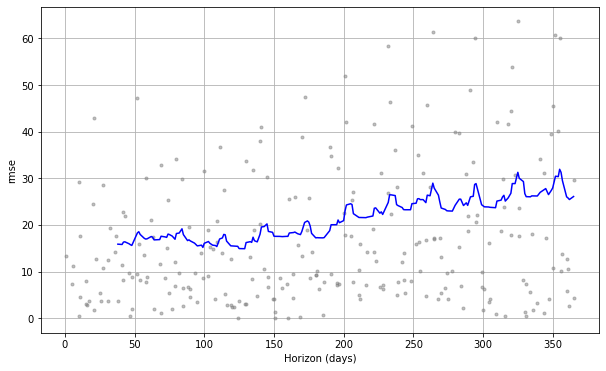

In [38]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')

#with respect to metrics, we can plot differently

In [ ]:
#no need to do stationarity, its handled by prophet